In [154]:
# =============================================================================
# ANÁLISE DE CHURN EM TELECOMUNICAÇÕES - TELECOM X2
# =============================================================================

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas do scikit-learn para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Algoritmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    ConfusionMatrixDisplay  # ⬅️ Adicione aqui
)

# Configurações para visualização
plt.style.use("default")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Configurações para pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

print("✅ Bibliotecas importadas com sucesso!")


✅ Bibliotecas importadas com sucesso!


In [155]:
# =============================================================================
# CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS
# =============================================================================

# Carregar os dados do CSV diretamente do GitHub
# Dataset: Dados de clientes de telecomunicações já pré-processados
# Fonte: Challenge TelecomX-2 (GitHub: FelpsMartini)
url = "https://raw.githubusercontent.com/FelpsMartini/Challenge_TelecomX-2/main/dados_tratados.csv"

try:
    df = pd.read_csv(url)
    print(f"✅ Dados carregados com sucesso!")
    print(f"📊 Shape do dataset: {df.shape}")
    print(f"📋 Colunas: {list(df.columns)}")
except Exception as e:
    print(f"❌ Erro ao carregar os dados: {e}")

# Visualizar as primeiras linhas
print("\n🔍 Primeiras 5 linhas do dataset:")
df.head()


✅ Dados carregados com sucesso!
📊 Shape do dataset: (7267, 22)
📋 Colunas: ['Id_cliente', 'Churn', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Tempo_servico', 'Servico_telefone', 'Varias_linhas', 'Servico_internet', 'Seguranca_online', 'Backup_online', 'Protecao_dispositivo', 'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes', 'Contrato', 'Fatura_papel', 'Metodo_pagamento', 'Taxas_mensais', 'Cobranca_total', 'Contas_diarias']

🔍 Primeiras 5 linhas do dataset:


,Id_cliente,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Contrato,Fatura_papel,Metodo_pagamento,Taxas_mensais,Cobranca_total,Contas_diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id_cliente            7267 non-null   object 
 1   Churn                 7043 non-null   float64
 2   Sexo                  7267 non-null   int64  
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   int64  
 5   Dependentes           7267 non-null   int64  
 6   Tempo_servico         7267 non-null   int64  
 7   Servico_telefone      7267 non-null   int64  
 8   Varias_linhas         7267 non-null   int64  
 9   Servico_internet      7267 non-null   object 
 10  Seguranca_online      7267 non-null   int64  
 11  Backup_online         7267 non-null   int64  
 12  Protecao_dispositivo  7267 non-null   int64  
 13  Suporte_tecnico       7267 non-null   int64  
 14  Streaming_TV          7267 non-null   int64  
 15  Streaming_filmes     

In [157]:
#2. Remoção de Colunas Irrelevantes
colunas_irrelevantes = ['Id_cliente']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
df.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Contrato,Fatura_papel,Metodo_pagamento,Taxas_mensais,Cobranca_total,Contas_diarias
0,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [158]:
#3. Encoding de Variáveis Categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Servico_internet', 'Contrato', 'Metodo_pagamento'], dtype='object')


In [159]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Servico_internet', 'Contrato', 'Metodo_pagamento'], dtype='object')


In [160]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

In [161]:
#4. Verificação da Proporção de Evasão

In [162]:
proporcao_evasao = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de Churn (0: Não Evadiu, 1: Evadiu):")
print(proporcao_evasao.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

if proporcao_evasao.min() < 20:
    print("\nAtenção: O conjunto de dados está desbalanceado.")

Proporção de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | proportion   |
|:--------|:-------------|
| 0.00    | 73.46        |
| 1.00    | 26.54        |


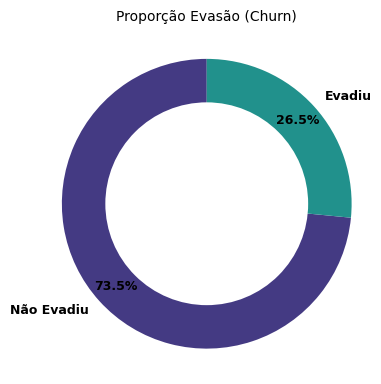

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Não Evadiu', 'Evadiu']
colors = ['#443A83FF', '#21918c']
plt.figure(figsize=(4, 4))
plt.pie(proporcao_evasao,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.4),
        textprops={'fontsize': 9, 'fontweight': 'bold'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporção Evasão (Churn)', fontsize=10, pad=9)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [164]:
#5. Normalização ou Padronização (se necessário)
colunas_numericas = ['Taxas_mensais', 'Cobranca_total']
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])
df_encoded.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Fatura_papel,Taxas_mensais,Cobranca_total,Contas_diarias,Servico_internet_Fiber optic,Servico_internet_No,Contrato_One year,Contrato_Two year,Metodo_pagamento_Credit card (automatic),Metodo_pagamento_Electronic check,Metodo_pagamento_Mailed check
0,0.0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,0.029206,-0.742291,2.19,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,1,0,0,0,0,0,1,0,-0.159990,-0.764729,2.00,False,False,False,False,False,False,True
2,1.0,1,0,0,0,4,1,0,0,0,1,0,0,0,1,0.304702,-0.880026,2.46,True,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,0,0,1,1,0,1,1,1,1.104635,-0.458160,3.27,True,False,False,False,False,True,False
4,1.0,0,1,1,0,3,1,0,0,0,0,1,1,0,1,0.636624,-0.885955,2.80,True,False,False,False,False,False,True


In [165]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

#Correlação e seleção de variáveis

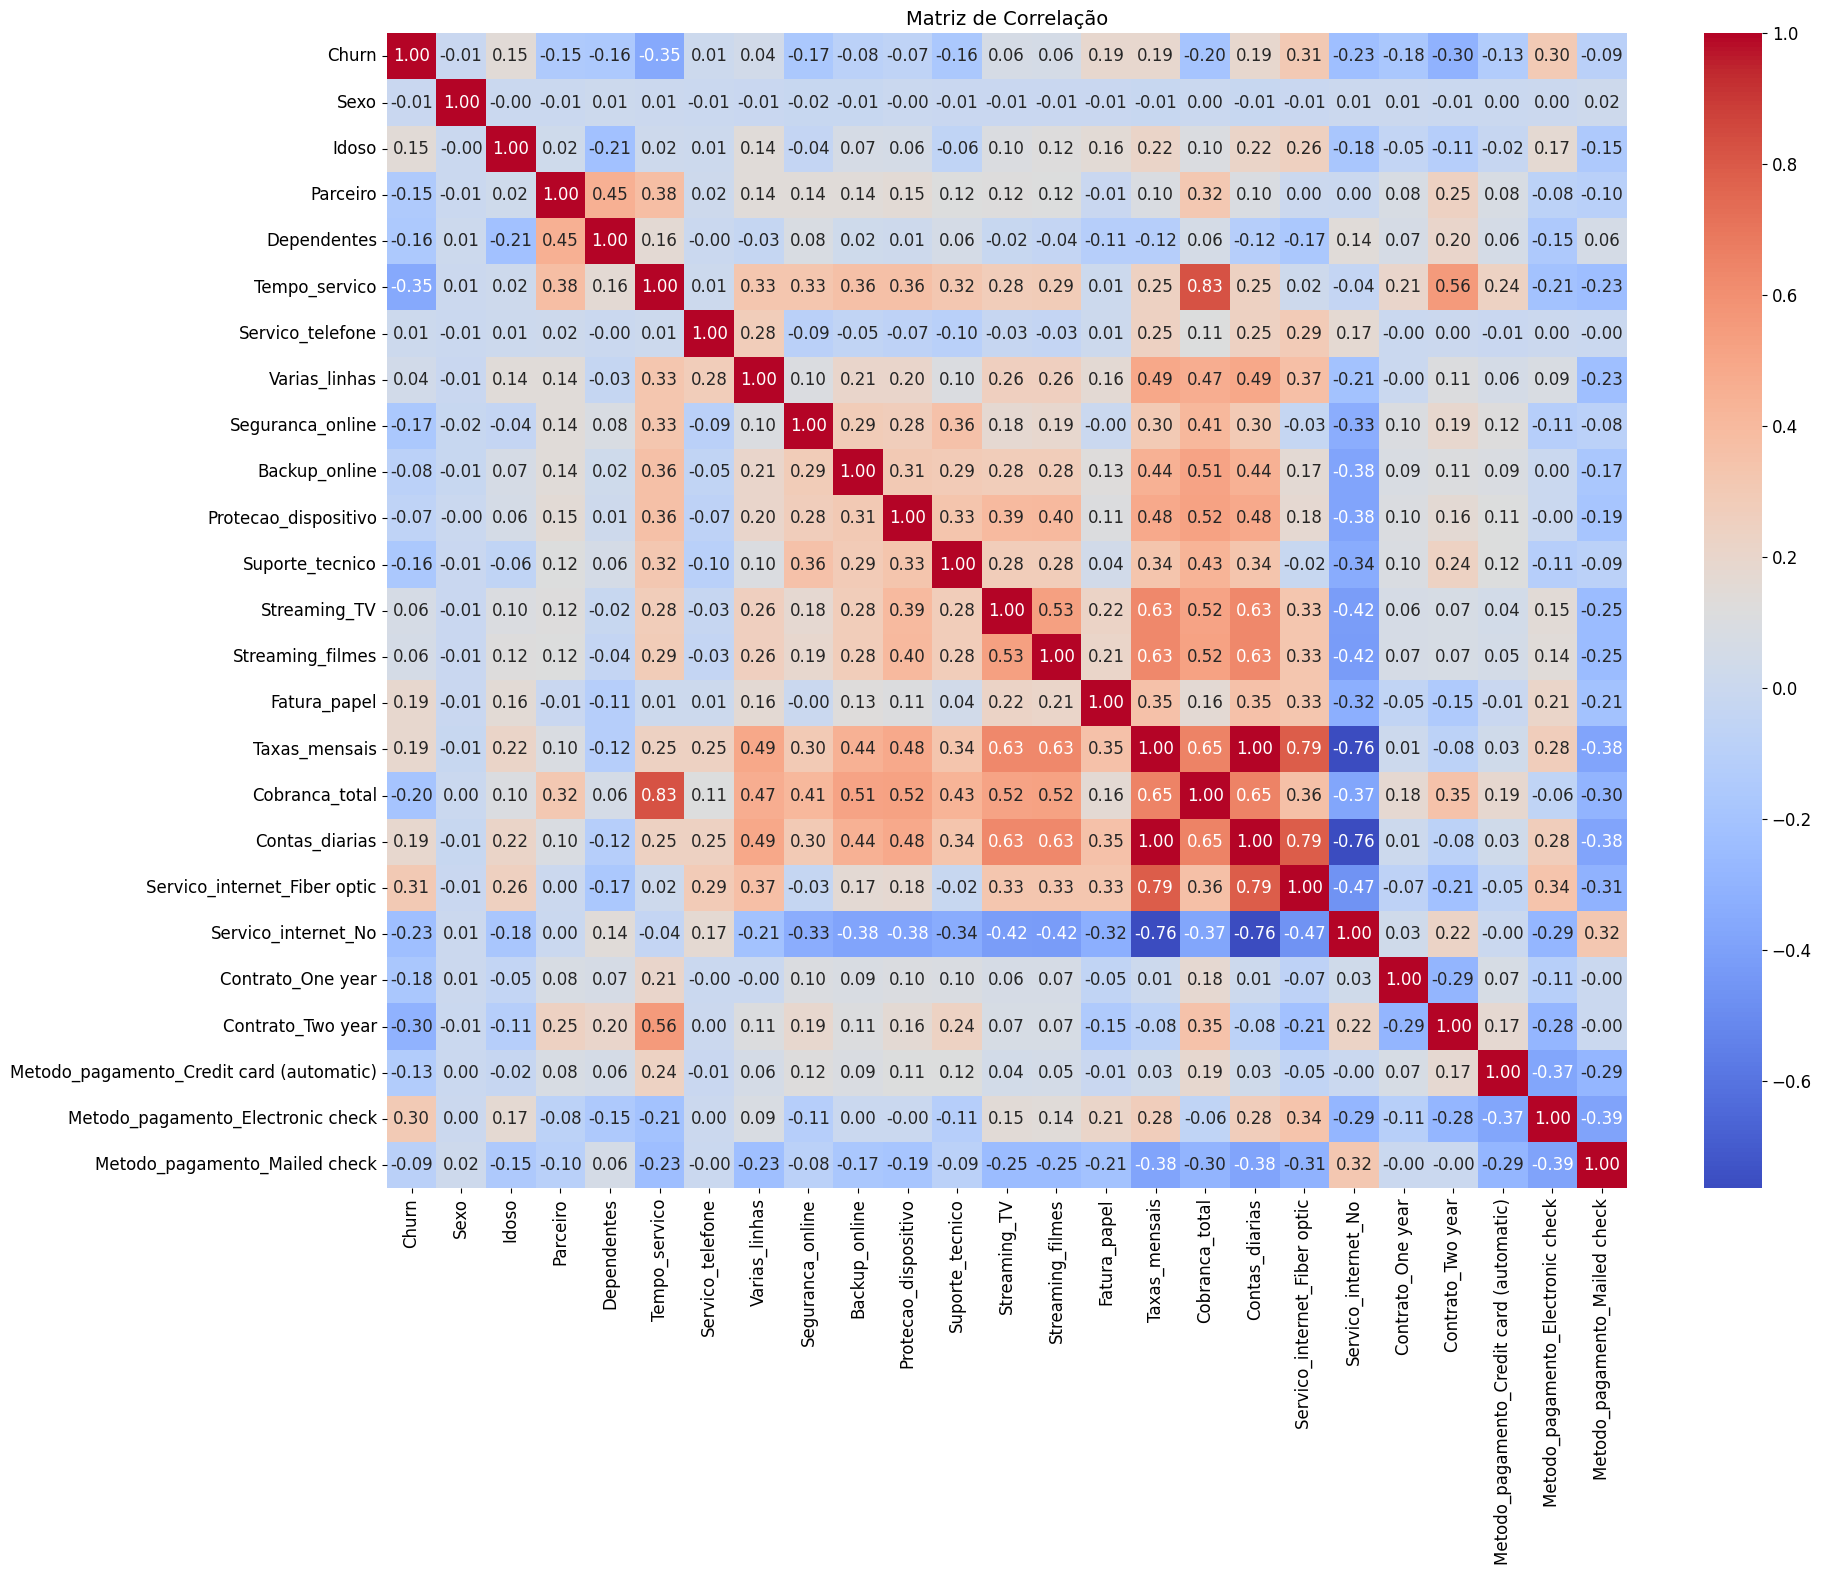

In [166]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=14)
plt.show()

In [167]:
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelação com a Evasão (Churn):")
print(correlation_with_churn.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))


Correlação com a Evasão (Churn):
|                                          | Churn   |
|:-----------------------------------------|:--------|
| Churn                                    | 1.00    |
| Servico_internet_Fiber optic             | 0.31    |
| Metodo_pagamento_Electronic check        | 0.30    |
| Contas_diarias                           | 0.19    |
| Taxas_mensais                            | 0.19    |
| Fatura_papel                             | 0.19    |
| Idoso                                    | 0.15    |
| Streaming_TV                             | 0.06    |
| Streaming_filmes                         | 0.06    |
| Varias_linhas                            | 0.04    |
| Servico_telefone                         | 0.01    |
| Sexo                                     | -0.01   |
| Protecao_dispositivo                     | -0.07   |
| Backup_online                            | -0.08   |
| Metodo_pagamento_Mailed check            | -0.09   |
| Metodo_pagamento_Credit card 


Estatísticas Não Evadiu
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tempo_servico, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tempo_servico, dtype: float64




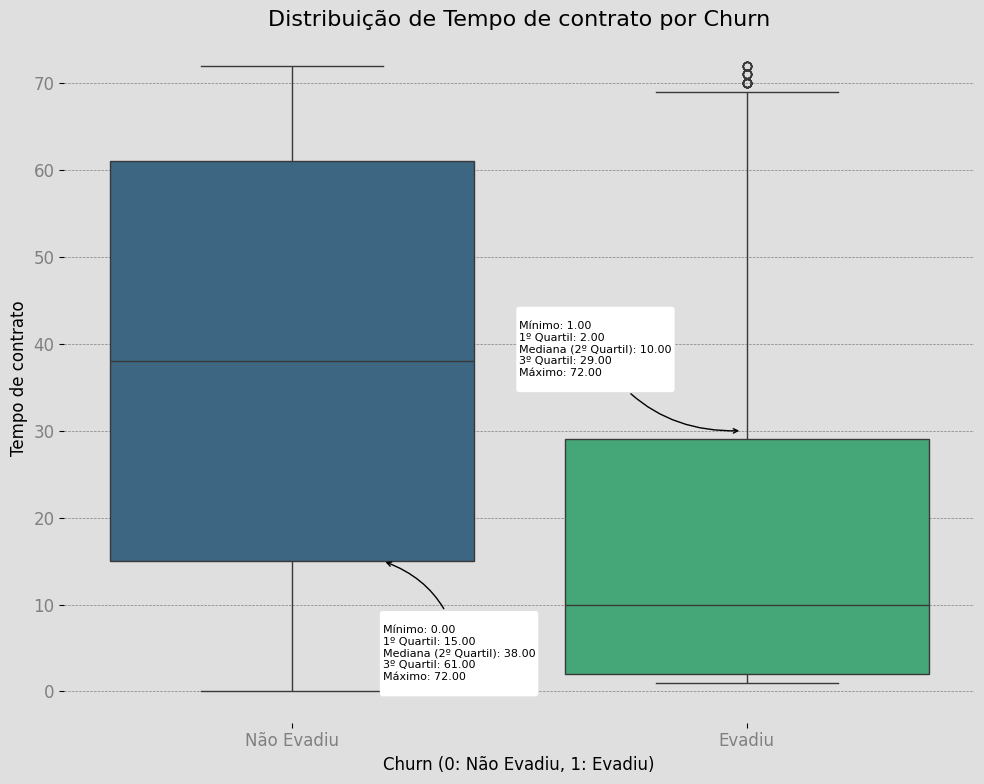

In [168]:
# 2. Análises Direcionadas
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Tempo_servico', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Tempo de contrato por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Tempo de contrato')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Tempo_servico'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Tempo_servico'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0.2, 15), xytext=(0.2, 0), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(0.99, 30), xytext=(0.5,35), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()


Estatísticas Não Evadiu
count    5174.000000
mean        0.120225
std         1.027094
min        -1.003831
25%        -0.751284
50%        -0.263460
75%         0.875325
max         2.819171
Name: Cobranca_total, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       -0.328582
std         0.833515
min        -0.995521
25%        -0.944540
50%        -0.693691
75%         0.023856
max         2.824615
Name: Cobranca_total, dtype: float64




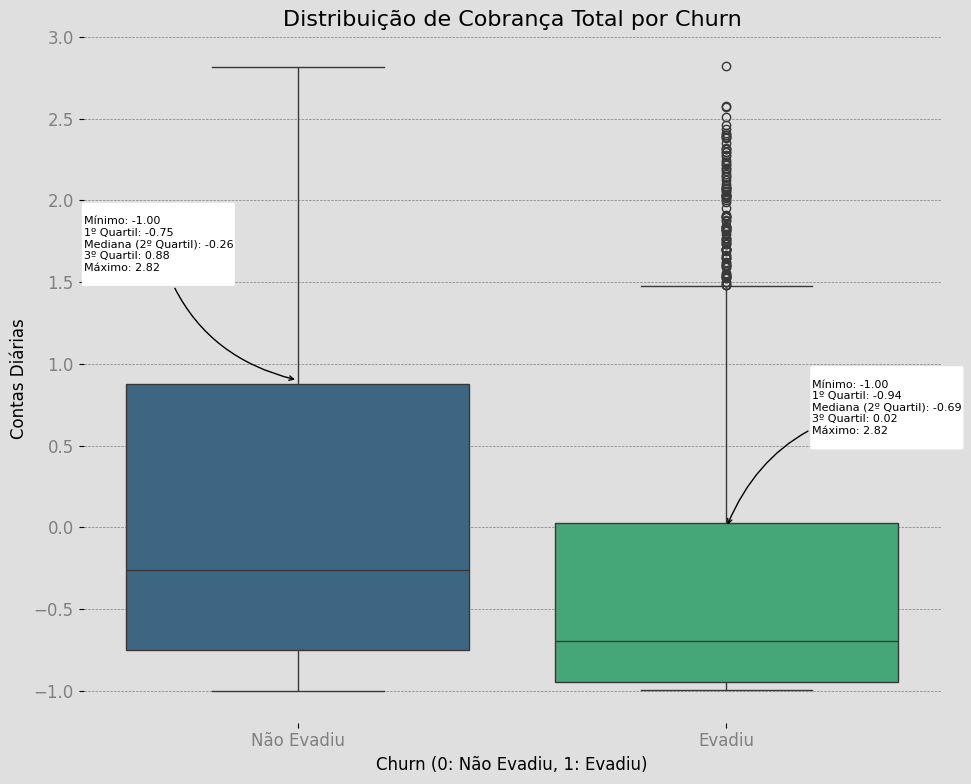

In [169]:
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Cobranca_total', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Cobrança Total por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Contas Diárias')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Cobranca_total'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Cobranca_total'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0, 0.9), xytext=(-0.5, 1.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(1, 0), xytext=(1.2, 0.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()


#Modelagem preditiva

In [170]:
#Removendo linhas com informação de NaN
df_encoded = df_encoded.dropna(subset=['Churn'])

In [171]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividindo os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
# Verificando se há valores ausentes em y_train
print(y_train.isnull().sum())

# Verificando se há NaNs na variável alvo antes da divisão
print(df_encoded['Churn'].isnull().sum())

0
0


In [173]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7043 non-null   int64  
 2   Idoso                                     7043 non-null   int64  
 3   Parceiro                                  7043 non-null   int64  
 4   Dependentes                               7043 non-null   int64  
 5   Tempo_servico                             7043 non-null   int64  
 6   Servico_telefone                          7043 non-null   int64  
 7   Varias_linhas                             7043 non-null   int64  
 8   Seguranca_online                          7043 non-null   int64  
 9   Backup_online                             7043 non-null   int64  
 10  Protecao_dispositivo                     

In [174]:
#1.Modelo 1: Regressão Logística
# Treinando a Regressão Logística com dados normalizados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Previsões de probabilidade (necessário para ROC e Precision-Recall)
# y_proba_logistic[:, 1] pega a probabilidade da classe positiva (1)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [175]:
#2.Modelo 2: Random Forest
# Treinando o Random Forest sem normalização (usando X_train e X_test originais)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

In [176]:
#3.Avaliação dos Modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Avaliando a Regressão Logística
evaluate_model(y_test, y_pred_logistic, "Regressão Logística")

# Avaliando Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.8062
Precisão: 0.6667
Recall: 0.5362
F1-score: 0.5944

Matriz de Confusão:
[[936 100]
 [173 200]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

----------------------------------------
--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.7956
Precisão: 0.6580
Recall: 0.4745
F1-score: 0.5514

Matriz de Confusão:
[[944  92]
 [196 177]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71 

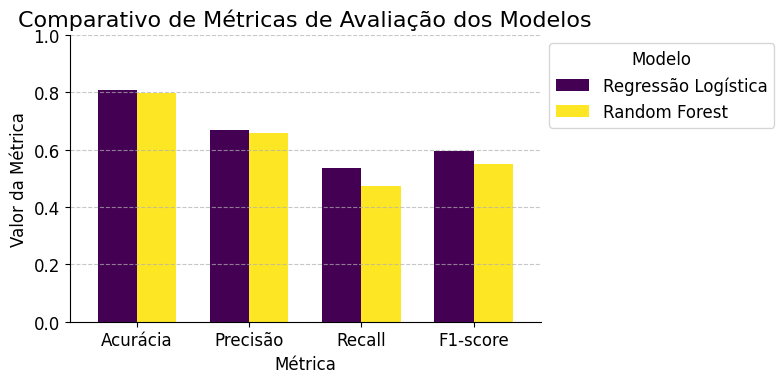

In [177]:

metrics_data = {
    "Regressão Logística": {
        "Acurácia": 0.8062,
        "Precisão": 0.6667,
        "Recall": 0.5362,
        "F1-score": 0.5944
    },
    "Random Forest": {
        "Acurácia": 0.7956,
        "Precisão": 0.6580,
        "Recall": 0.4745,
        "F1-score": 0.5514
    }
}

df_metrics = pd.DataFrame(metrics_data)
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Comparativo de Métricas de Avaliação dos Modelos', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

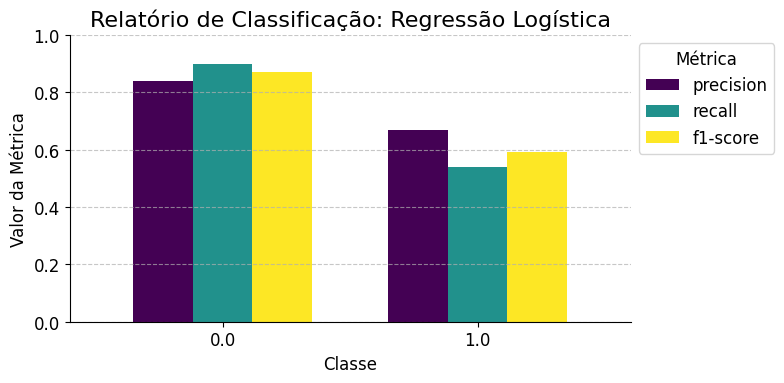

In [178]:
logistic_report = {
    "precision": {"0.0": 0.84, "1.0": 0.67},
    "recall": {"0.0": 0.90, "1.0": 0.54},
    "f1-score": {"0.0": 0.87, "1.0": 0.59},
    "support": {"0.0": 1036, "1.0": 373}
}

df_logistic_report = pd.DataFrame(logistic_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_logistic_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Regressão Logística', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

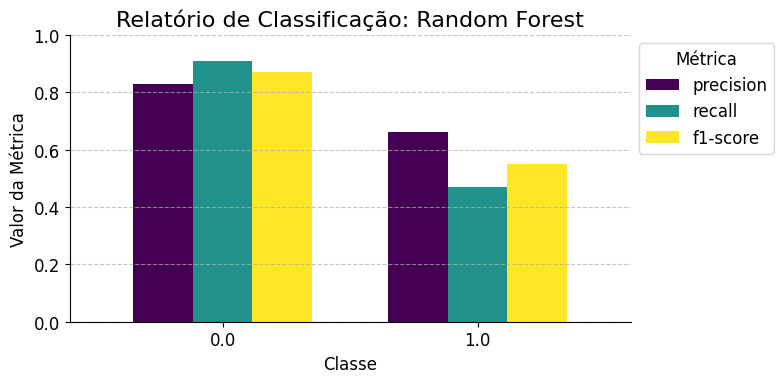

In [179]:
# Dados do relatório de classificação do Random Forest
rf_report = {
    "precision": {"0.0": 0.83, "1.0": 0.66},
    "recall": {"0.0": 0.91, "1.0": 0.47},
    "f1-score": {"0.0": 0.87, "1.0": 0.55},
    "support": {"0.0": 1036, "1.0": 373}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Random Forest', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

<Figure size 400x400 with 0 Axes>

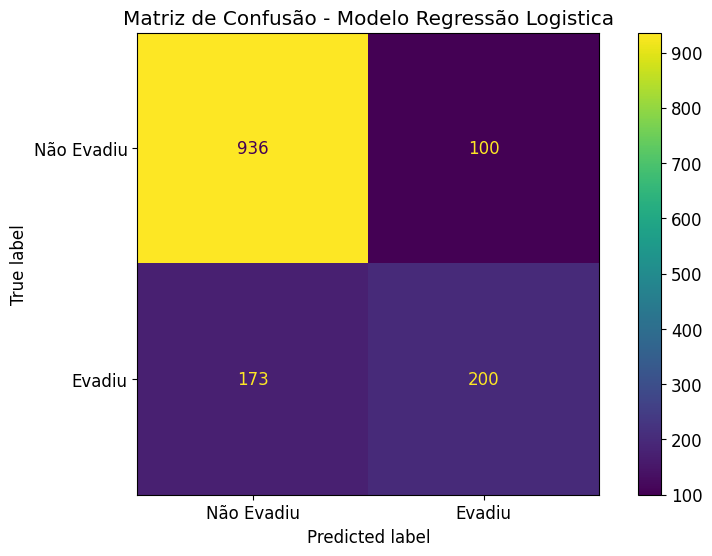

In [180]:
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Modelo Regressão Logistica')
plt.grid(False)
plt.show()

<Figure size 400x400 with 0 Axes>

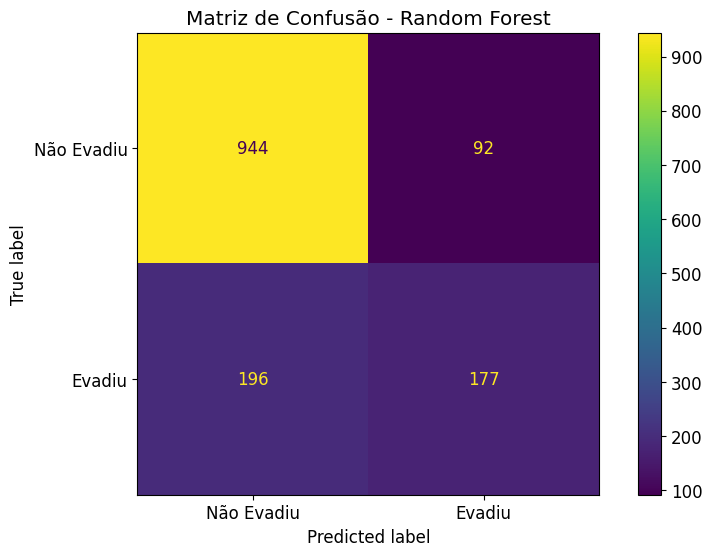

In [181]:
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.show()

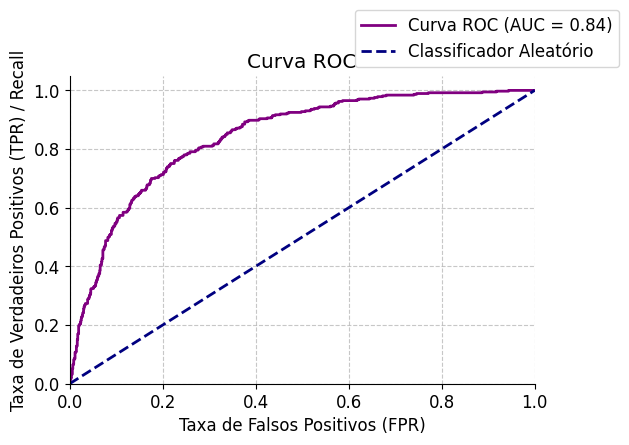

In [182]:
# 2. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.legend(bbox_to_anchor=(1.2, 1), loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

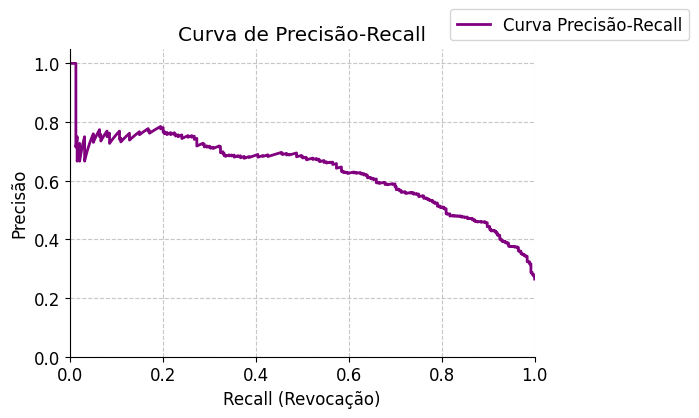

In [183]:
# 3. Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_logistic)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2, label='Curva Precisão-Recall')
plt.xlabel('Recall (Revocação)')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.legend(bbox_to_anchor=(0.8, 1), loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

1. Qual modelo teve o melhor desempenho?

Comparando as principais métricas para a classe 1 (Evadiu).

Métrica	Reg. Log.	Random Forest
Acurácia	0.8062	0.7956
Precisão	0.6667	0.6580
Recall	0.5362	0.4745
F1-score	0.5944	0.5514
✅ Conclusão:

A Regressão Logística apresentou desempenho superior em todas as métricas para a classe minoritária (Evadiu), especialmente no Recall, que mede a capacidade de identificar corretamente os clientes que vão evadir.

Isso é crítico em casos de churn, onde é preferível errar por excesso (falsos positivos) do que por omissão (falsos negativos).

Algum modelo apresentou overfitting ou underfitting?
▶ Regressão Logística

Bom equilíbrio entre precisão (0.67) e recall (0.54), com F1-score razoável (0.59).

A diferença entre as métricas das duas classes não é extrema.

Não há sinais claros de overfitting ou underfitting.

Modelo simples e interpretável, ideal para dados com relações lineares.

Conclusão: Modelo bem ajustado.

▶ Random Forest

Embora seja um modelo mais complexo, seu desempenho é ligeiramente inferior em todas as métricas.

Recall da classe "Evadiu" caiu para 0.47, o que indica que o modelo não está captando bem os padrões da classe minoritária.

Pode ser um caso de leve underfitting, o que é contraintuitivo para Random Forest — que costuma tender ao overfitting se mal regulado.

Conclusão: Possível underfitting leve — o modelo não está aproveitando todo seu potencial.

✅ Conclusão Geral

A Regressão Logística é o modelo mais indicado com base nas métricas apresentadas: melhor desempenho, mais interpretável, e sem sinais de overfitting ou underfitting.
O Random Forest, embora potencialmente mais poderoso, está subutilizado — provavelmente por falta de ajustes nos parâmetros ou balanceamento de classes. Com melhorias, pode se tornar competitivo ou até superior.

#Interpretação e conclusões

In [184]:
# Coeficientes da Regressão Logística
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---")
print(coefficients.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---
                                 Feature  Coefficient  Absolute_Coefficient
                           Tempo_servico    -1.431594              1.431594
                          Cobranca_total     0.690848              0.690848
                       Contrato_Two year    -0.646547              0.646547
            Servico_internet_Fiber optic     0.558005              0.558005
                     Servico_internet_No    -0.462619              0.462619
                       Contrato_One year    -0.292323              0.292323
                           Taxas_mensais    -0.259757              0.259757
                          Contas_diarias    -0.187013              0.187013
                            Streaming_TV     0.181739              0.181739
                           Varias_linhas     0.174945              0.174945
       Metodo_pagamento_Electronic check     0.165310              0.165310
               

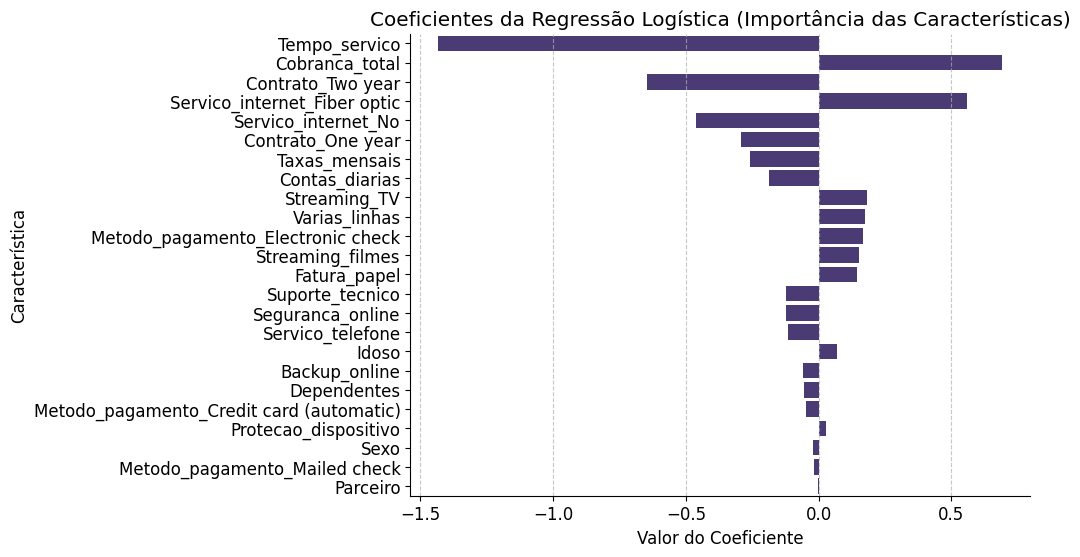

In [185]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)  # sem palette
plt.title('Coeficientes da Regressão Logística (Importância das Características)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

 Interpretação dos Coeficientes:

Sinal: Um coeficiente positivo indica que, quanto maior o valor da feature, maior a probabilidade de churn. Um coeficiente negativo indica o oposto.

Magnitude: A magnitude (valor absoluto) do coeficiente reflete a força da influência da feature na probabilidade de churn. Coeficientes com valores absolutos maiores são mais importantes.

In [186]:
# Treinar o modelo Random Forest (sem normalização, como já feito)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Importância das variáveis do Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---")
print(feature_importances.head(24).to_string(index=False))
print("-" * 70)

--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---
                                 Feature  Importance
                          Cobranca_total    0.172899
                           Tempo_servico    0.150137
                           Taxas_mensais    0.135572
                          Contas_diarias    0.122270
            Servico_internet_Fiber optic    0.043272
       Metodo_pagamento_Electronic check    0.040483
                       Contrato_Two year    0.036269
                                    Sexo    0.024989
                            Fatura_papel    0.024645
                       Contrato_One year    0.023695
                         Suporte_tecnico    0.021932
                                Parceiro    0.021523
                        Seguranca_online    0.020614
                           Backup_online    0.018991
                                   Idoso    0.018928
                             Dependentes    0.018327
                   

• Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores

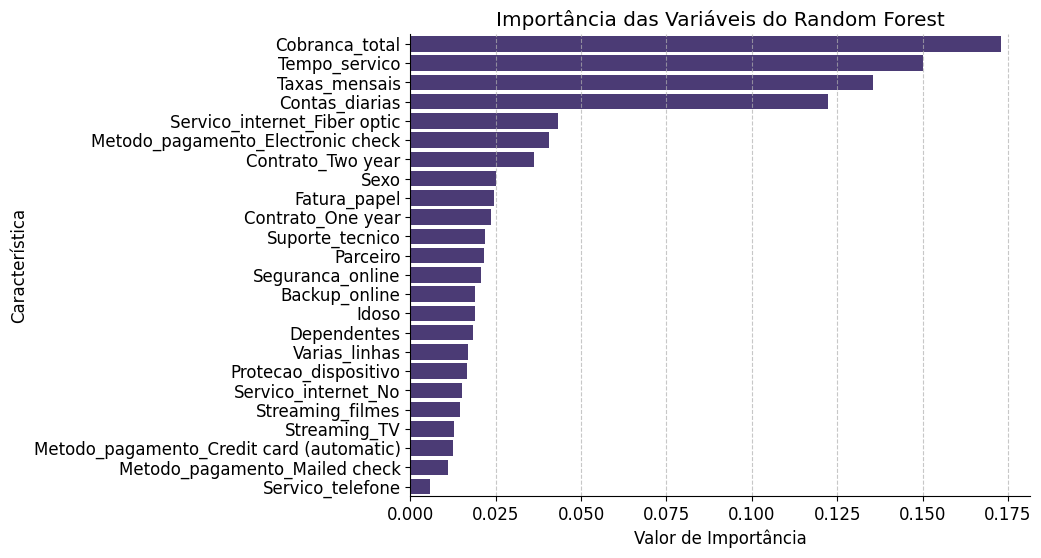

In [187]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importância das Variáveis do Random Forest')
plt.xlabel('Valor de Importância')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

Interpretação da Importância das Variáveis:

Valores maiores de "Importance" indicam que a variável teve um papel mais significativo na capacidade do modelo de prever o churn.

Variáveis como Cobranca_total, Tempo_serico, Taxas_mensais e tipos de contrato tendem a ser muito relevantes, pois são frequentemente utilizadas para dividir os dados nas árvores de decisão.

• SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.

In [188]:
# Treinar o modelo SVM (com kernel linear para interpretar coeficientes)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Coeficientes do SVM Linear.
# svm_model.coef_[0] contém os coeficientes para a primeira (e única) classe positiva em uma classificação binária
coefficients_svm = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
coefficients_svm['Absolute_Coefficient'] = abs(coefficients_svm['Coefficient'])
coefficients_svm = coefficients_svm.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---")
print(coefficients_svm.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---
                                 Feature  Coefficient  Absolute_Coefficient
            Servico_internet_Fiber optic     0.741572              0.741572
                           Tempo_servico    -0.513671              0.513671
                           Taxas_mensais    -0.304564              0.304564
                          Cobranca_total    -0.302803              0.302803
                     Servico_internet_No    -0.194134              0.194134
                        Streaming_filmes     0.145354              0.145354
                            Streaming_TV     0.141969              0.141969
                           Varias_linhas     0.136781              0.136781
                       Contrato_One year    -0.131202              0.131202
       Metodo_pagamento_Electronic check     0.126704              0.126704
                         Suporte_tecnico    -0.100208              0.100208
          

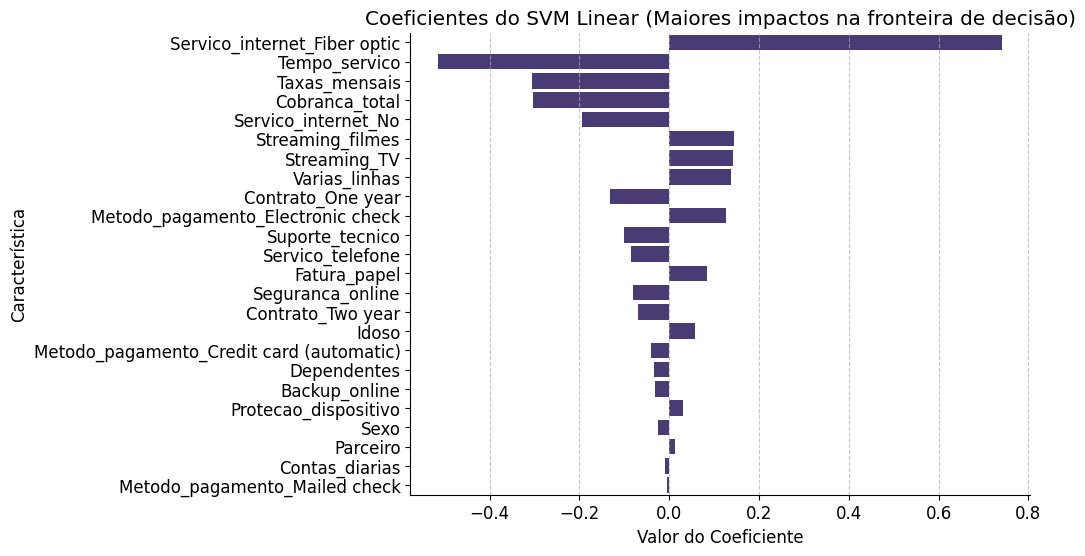

In [189]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_svm)
plt.title('Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

#Relatório de Análise de Evasão de Clientes (Churn) II

📄Visão Geral

O objetivo deste estudo foi identificar os principais fatores que influenciam a evasão de clientes (churn) em uma empresa de telecomunicações e construir modelos preditivos capazes de prever a probabilidade de saída dos clientes. Foram utilizados modelos de Regressão Logística, Random Forest e SVM, com destaque para a interpretação dos resultados e análise de variáveis.

O conjunto de dados contém informações de 7.267 clientes. A análise de evasão revelou um desequilíbrio significativo entre as classes, com 73,5% dos clientes não evadidos e 26,5% dos clientes evadidos.

In [190]:
# =============================================================================
# INFORMAÇÕES GERAIS DO DATASET
# =============================================================================

# Verificar informações gerais sobre o dataset
# - Tipos de dados
# - Valores nulos
# - Memória utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 7043 non-null   float64
 1   Sexo                  7267 non-null   int64  
 2   Idoso                 7267 non-null   int64  
 3   Parceiro              7267 non-null   int64  
 4   Dependentes           7267 non-null   int64  
 5   Tempo_servico         7267 non-null   int64  
 6   Servico_telefone      7267 non-null   int64  
 7   Varias_linhas         7267 non-null   int64  
 8   Servico_internet      7267 non-null   object 
 9   Seguranca_online      7267 non-null   int64  
 10  Backup_online         7267 non-null   int64  
 11  Protecao_dispositivo  7267 non-null   int64  
 12  Suporte_tecnico       7267 non-null   int64  
 13  Streaming_TV          7267 non-null   int64  
 14  Streaming_filmes      7267 non-null   int64  
 15  Contrato             

In [191]:
#2. Remoção de Colunas Irrelevantes
colunas_irrelevantes = ['Id_cliente']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
df.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Contrato,Fatura_papel,Metodo_pagamento,Taxas_mensais,Cobranca_total,Contas_diarias
0,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [192]:
#3. Encoding de Variáveis Categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Servico_internet', 'Contrato', 'Metodo_pagamento'], dtype='object')


In [193]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Servico_internet', 'Contrato', 'Metodo_pagamento'], dtype='object')


In [194]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

In [195]:
#4. Verificação da Proporção de Evasão

In [196]:
proporcao_evasao = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de Churn (0: Não Evadiu, 1: Evadiu):")
print(proporcao_evasao.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

if proporcao_evasao.min() < 20:
    print("\nAtenção: O conjunto de dados está desbalanceado.")

Proporção de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | proportion   |
|:--------|:-------------|
| 0.00    | 73.46        |
| 1.00    | 26.54        |


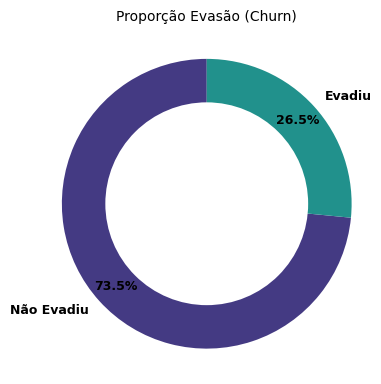

In [225]:
labels = ['Não Evadiu', 'Evadiu']
colors = ['#443A83FF', '#21918c']
plt.figure(figsize=(4, 4))
plt.pie(proporcao_evasao,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.4),
        textprops={'fontsize': 9, 'fontweight': 'bold'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporção Evasão (Churn)', fontsize=10, pad=9)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [198]:
#5. Normalização ou Padronização (se necessário)
colunas_numericas = ['Taxas_mensais', 'Cobranca_total']
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])
df_encoded.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Fatura_papel,Taxas_mensais,Cobranca_total,Contas_diarias,Servico_internet_Fiber optic,Servico_internet_No,Contrato_One year,Contrato_Two year,Metodo_pagamento_Credit card (automatic),Metodo_pagamento_Electronic check,Metodo_pagamento_Mailed check
0,0.0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,0.029206,-0.742291,2.19,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,1,0,0,0,0,0,1,0,-0.159990,-0.764729,2.00,False,False,False,False,False,False,True
2,1.0,1,0,0,0,4,1,0,0,0,1,0,0,0,1,0.304702,-0.880026,2.46,True,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,0,0,1,1,0,1,1,1,1.104635,-0.458160,3.27,True,False,False,False,False,True,False
4,1.0,0,1,1,0,3,1,0,0,0,0,1,1,0,1,0.636624,-0.885955,2.80,True,False,False,False,False,False,True


In [199]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

#Correlação e seleção de variáveis

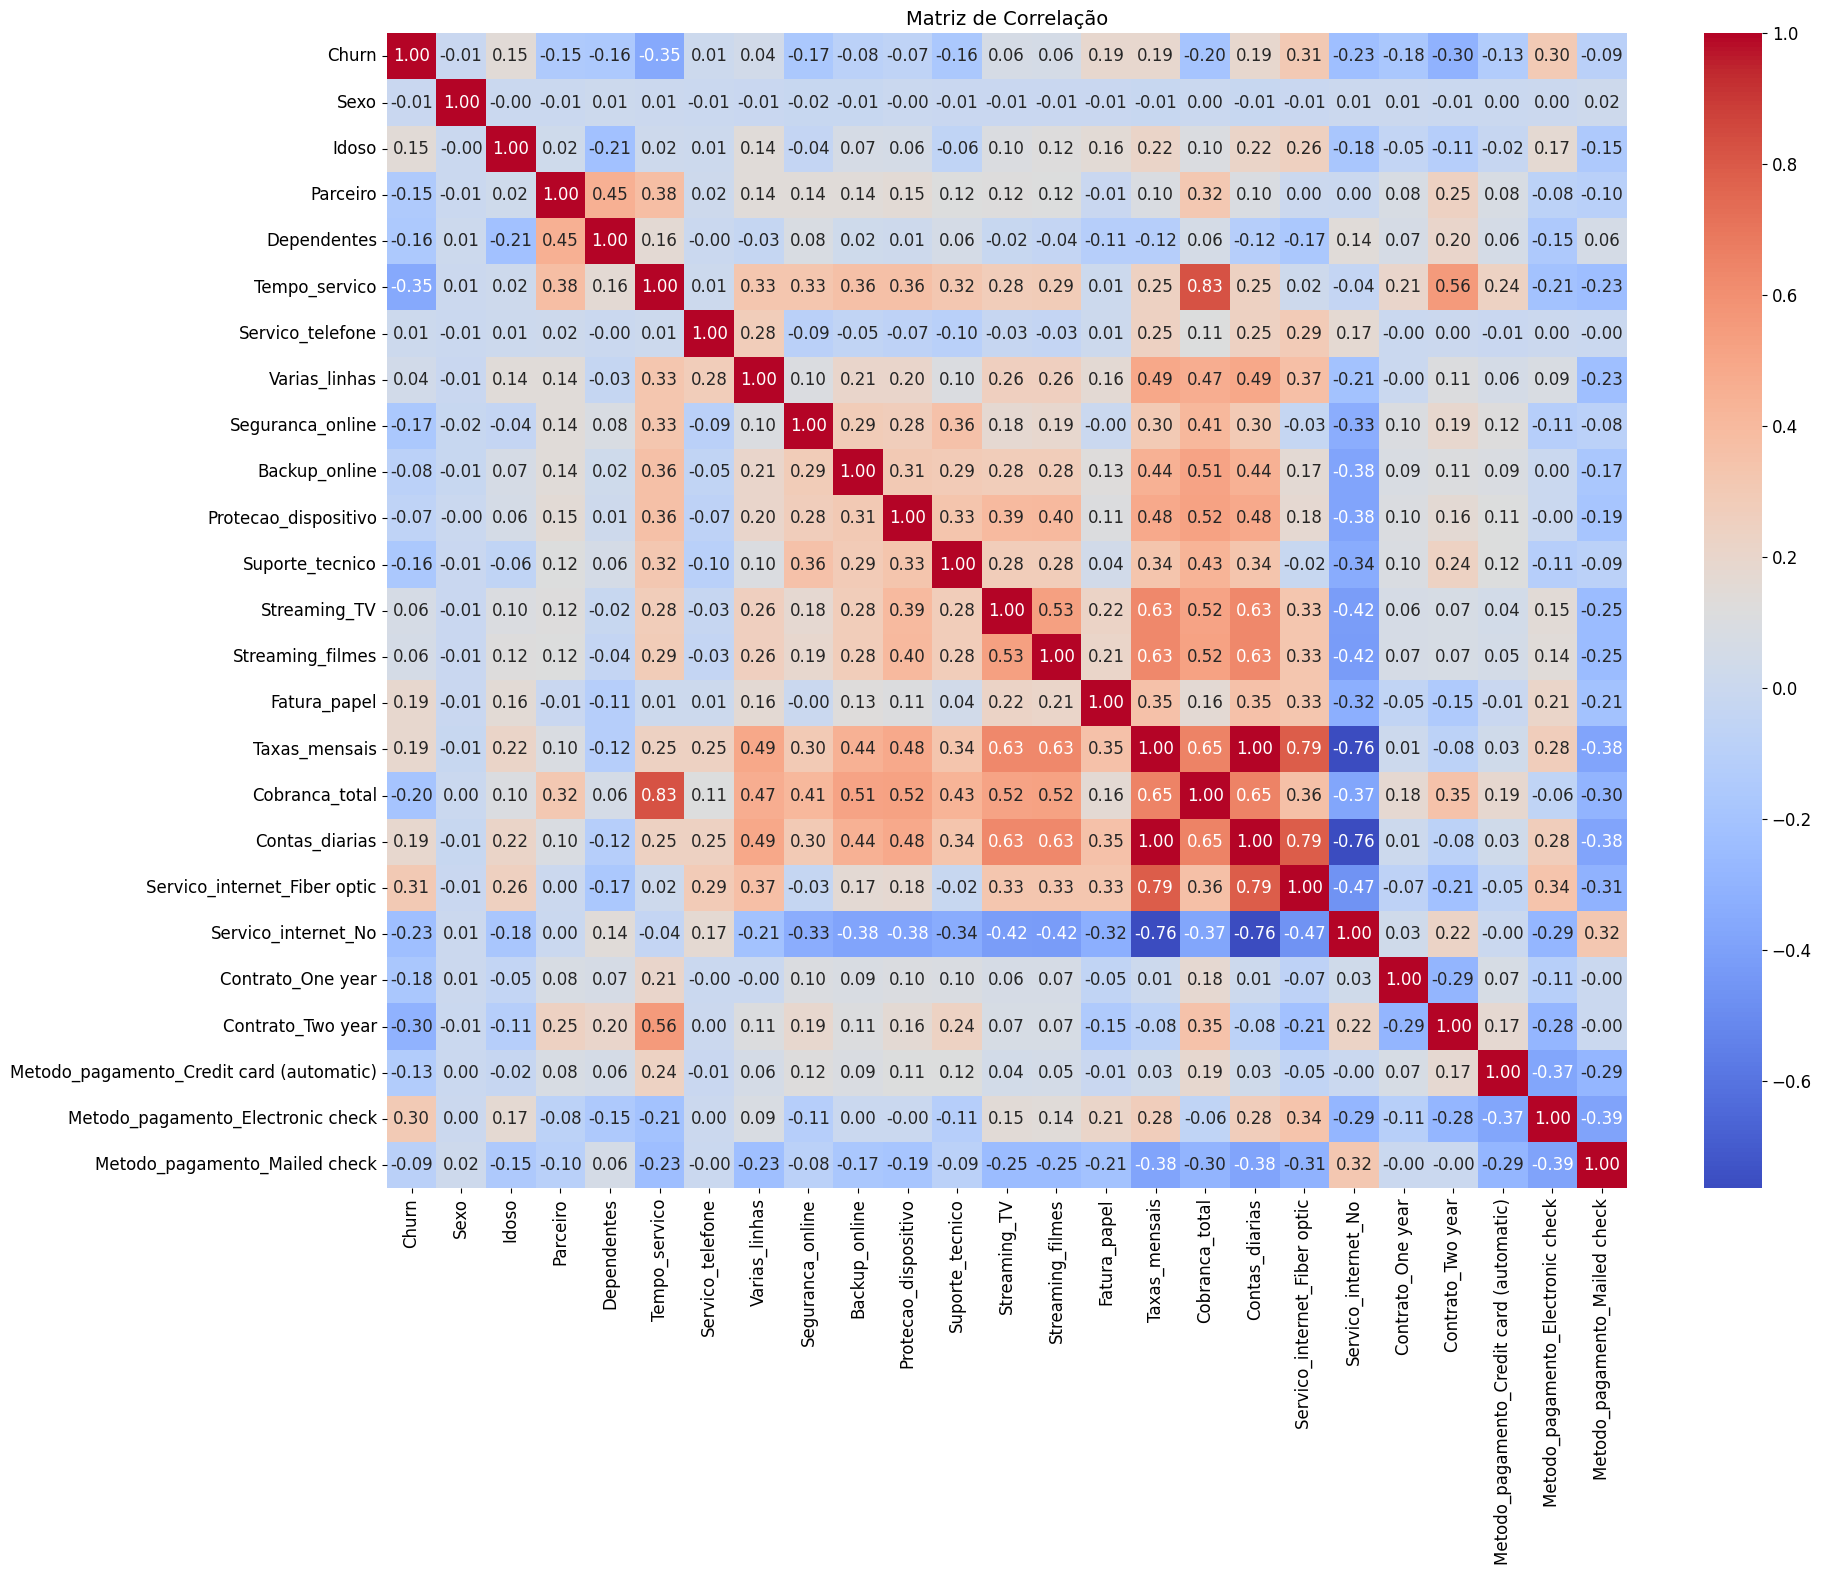

In [200]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=14)
plt.show()

In [201]:
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelação com a Evasão (Churn):")
print(correlation_with_churn.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))


Correlação com a Evasão (Churn):
|                                          | Churn   |
|:-----------------------------------------|:--------|
| Churn                                    | 1.00    |
| Servico_internet_Fiber optic             | 0.31    |
| Metodo_pagamento_Electronic check        | 0.30    |
| Contas_diarias                           | 0.19    |
| Taxas_mensais                            | 0.19    |
| Fatura_papel                             | 0.19    |
| Idoso                                    | 0.15    |
| Streaming_TV                             | 0.06    |
| Streaming_filmes                         | 0.06    |
| Varias_linhas                            | 0.04    |
| Servico_telefone                         | 0.01    |
| Sexo                                     | -0.01   |
| Protecao_dispositivo                     | -0.07   |
| Backup_online                            | -0.08   |
| Metodo_pagamento_Mailed check            | -0.09   |
| Metodo_pagamento_Credit card 


Estatísticas Não Evadiu
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tempo_servico, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tempo_servico, dtype: float64




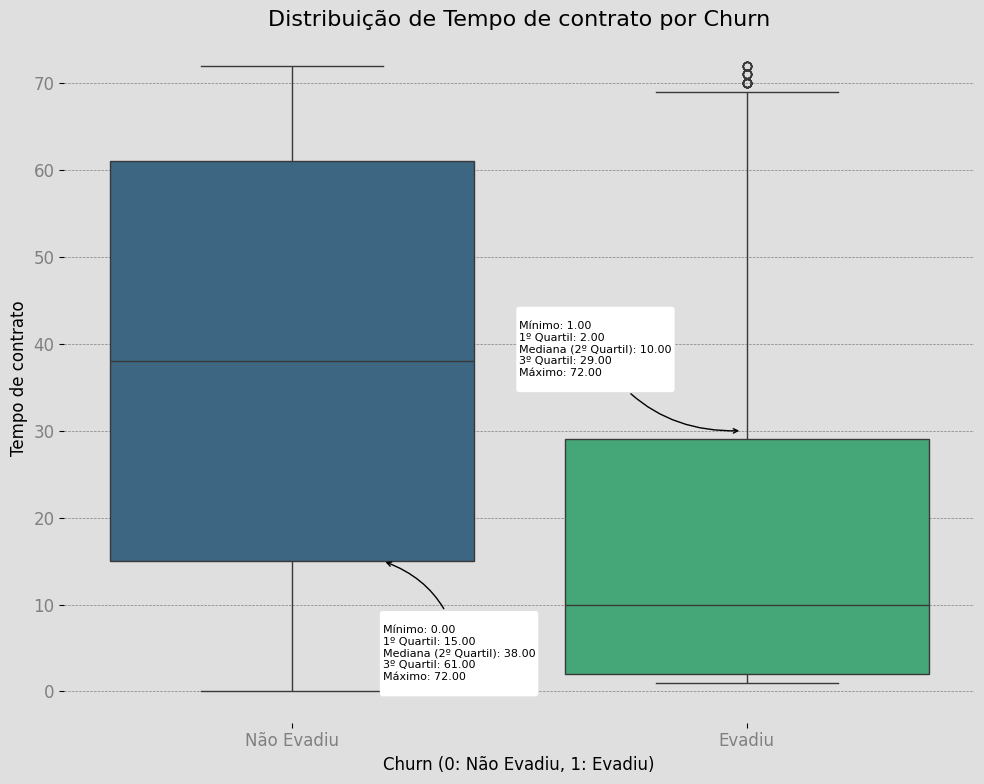

In [202]:
# 2. Análises Direcionadas
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Tempo_servico', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Tempo de contrato por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Tempo de contrato')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Tempo_servico'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Tempo_servico'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0.2, 15), xytext=(0.2, 0), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(0.99, 30), xytext=(0.5,35), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()


Estatísticas Não Evadiu
count    5174.000000
mean        0.120225
std         1.027094
min        -1.003831
25%        -0.751284
50%        -0.263460
75%         0.875325
max         2.819171
Name: Cobranca_total, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       -0.328582
std         0.833515
min        -0.995521
25%        -0.944540
50%        -0.693691
75%         0.023856
max         2.824615
Name: Cobranca_total, dtype: float64




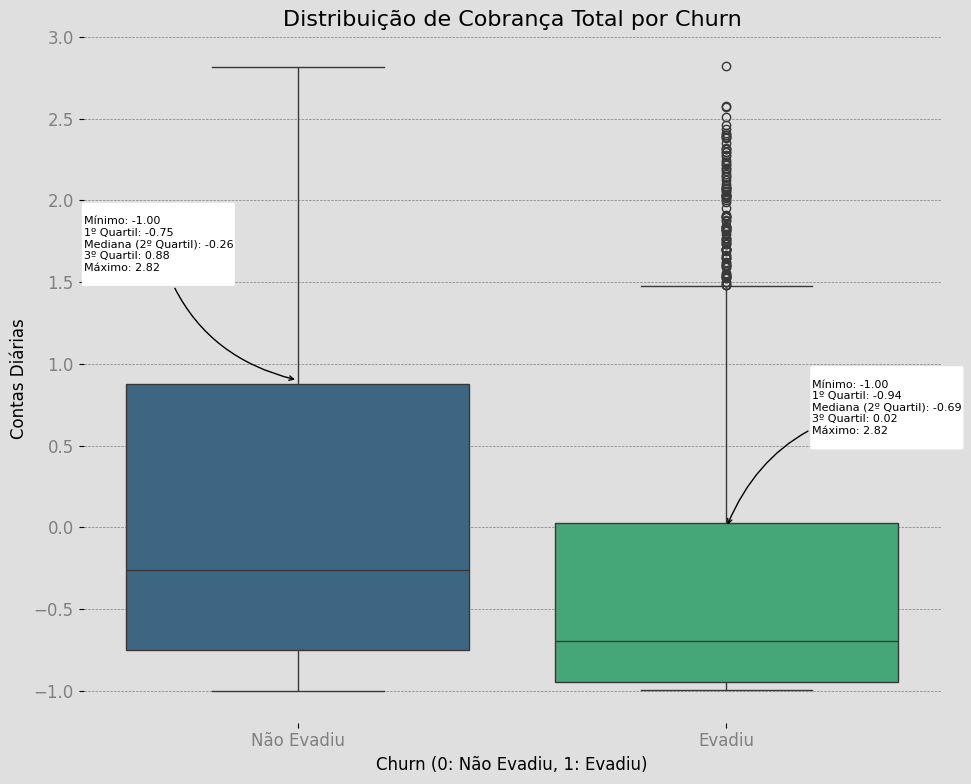

In [203]:
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Cobranca_total', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Cobrança Total por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Contas Diárias')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Cobranca_total'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Cobranca_total'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0, 0.9), xytext=(-0.5, 1.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(1, 0), xytext=(1.2, 0.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()


#Modelagem preditiva

In [204]:
#Removendo linhas com informação de NaN
df_encoded = df_encoded.dropna(subset=['Churn'])

In [205]:
# =============================================================================
# DIVISÃO DOS DADOS EM TREINO E TESTE
# =============================================================================

# Separar features (X) da variável target (y)
# X: todas as variáveis exceto Id_cliente e Churn
# y: variável target (Churn)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividindo os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Verificar as dimensões dos conjuntos
print(f"📊 Conjunto de treino: {X_train.shape}")
print(f"📊 Conjunto de teste: {X_test.shape}")
print(f"📊 Distribuição do target no treino: {y_train.value_counts()}")
print(f"📊 Distribuição do target no teste: {y_test.value_counts()}")


📊 Conjunto de treino: (5634, 24)
📊 Conjunto de teste: (1409, 24)
📊 Distribuição do target no treino: Churn
0.0    4138
1.0    1496
Name: count, dtype: int64
📊 Distribuição do target no teste: Churn
0.0    1036
1.0     373
Name: count, dtype: int64


In [206]:
# Verificando se há valores ausentes em y_train
print(y_train.isnull().sum())

# Verificando se há NaNs na variável alvo antes da divisão
print(df_encoded['Churn'].isnull().sum())

0
0


In [207]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7043 non-null   int64  
 2   Idoso                                     7043 non-null   int64  
 3   Parceiro                                  7043 non-null   int64  
 4   Dependentes                               7043 non-null   int64  
 5   Tempo_servico                             7043 non-null   int64  
 6   Servico_telefone                          7043 non-null   int64  
 7   Varias_linhas                             7043 non-null   int64  
 8   Seguranca_online                          7043 non-null   int64  
 9   Backup_online                             7043 non-null   int64  
 10  Protecao_dispositivo                     

In [208]:
# =============================================================================
# TREINAMENTO DO MODELO - REGRESSÃO LOGÍSTICA
# =============================================================================

# Regressão Logística:
# - Algoritmo linear para classificação binária
# - Interpreta probabilidades usando função sigmoid
# - Coeficientes indicam importância e direção das features
# - random_state=42 para reprodutibilidade
#1.Modelo 1: Regressão Logística
# Treinando a Regressão Logística com dados normalizados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Previsões de probabilidade (necessário para ROC e Precision-Recall)
# y_proba_logistic[:, 1] pega a probabilidade da classe positiva (1)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [209]:
# =============================================================================
# TREINAMENTO DO MODELO - RANDOM FOREST
# =============================================================================

# Random Forest:
# - Ensemble de múltiplas árvores de decisão
# - Reduz overfitting através de bagging
# - Fornece importância das features
# - Robusto a outliers e dados desbalanceados
# - random_state=42 para reprodutibilidade
#2.Modelo 2: Random Forest
# Treinando o Random Forest sem normalização (usando X_train e X_test originais)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

In [210]:
#3.Avaliação dos Modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Avaliando a Regressão Logística
evaluate_model(y_test, y_pred_logistic, "Regressão Logística")

# Avaliando Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.8062
Precisão: 0.6667
Recall: 0.5362
F1-score: 0.5944

Matriz de Confusão:
[[936 100]
 [173 200]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

----------------------------------------
--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.7956
Precisão: 0.6580
Recall: 0.4745
F1-score: 0.5514

Matriz de Confusão:
[[944  92]
 [196 177]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71 

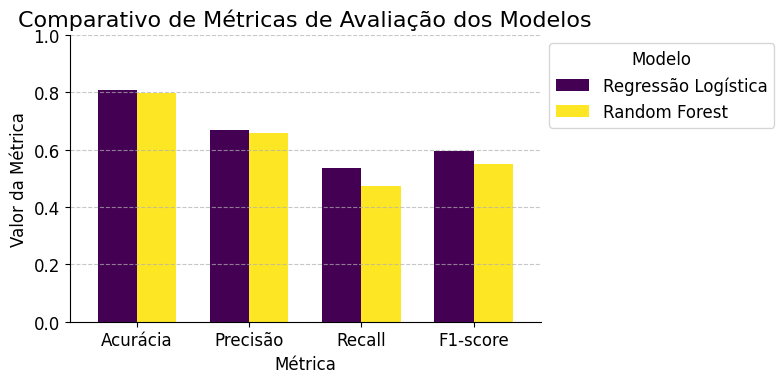

In [211]:

metrics_data = {
    "Regressão Logística": {
        "Acurácia": 0.8062,
        "Precisão": 0.6667,
        "Recall": 0.5362,
        "F1-score": 0.5944
    },
    "Random Forest": {
        "Acurácia": 0.7956,
        "Precisão": 0.6580,
        "Recall": 0.4745,
        "F1-score": 0.5514
    }
}

df_metrics = pd.DataFrame(metrics_data)
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Comparativo de Métricas de Avaliação dos Modelos', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

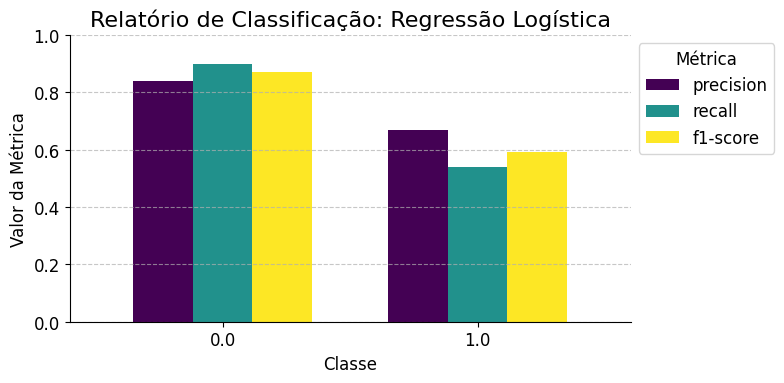

In [212]:
logistic_report = {
    "precision": {"0.0": 0.84, "1.0": 0.67},
    "recall": {"0.0": 0.90, "1.0": 0.54},
    "f1-score": {"0.0": 0.87, "1.0": 0.59},
    "support": {"0.0": 1036, "1.0": 373}
}

df_logistic_report = pd.DataFrame(logistic_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_logistic_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Regressão Logística', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

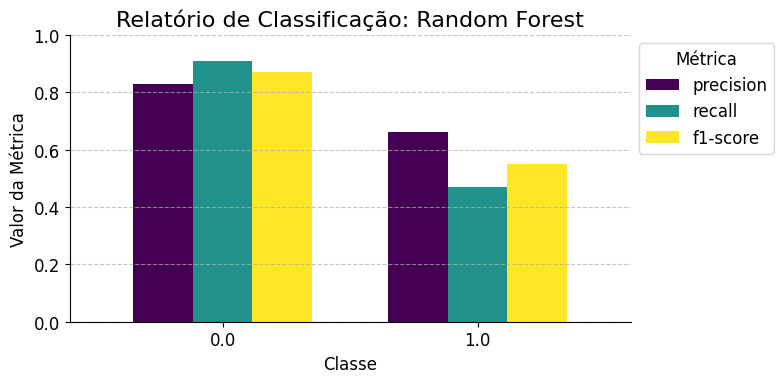

In [213]:
# Dados do relatório de classificação do Random Forest
rf_report = {
    "precision": {"0.0": 0.83, "1.0": 0.66},
    "recall": {"0.0": 0.91, "1.0": 0.47},
    "f1-score": {"0.0": 0.87, "1.0": 0.55},
    "support": {"0.0": 1036, "1.0": 373}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Random Forest', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

<Figure size 400x400 with 0 Axes>

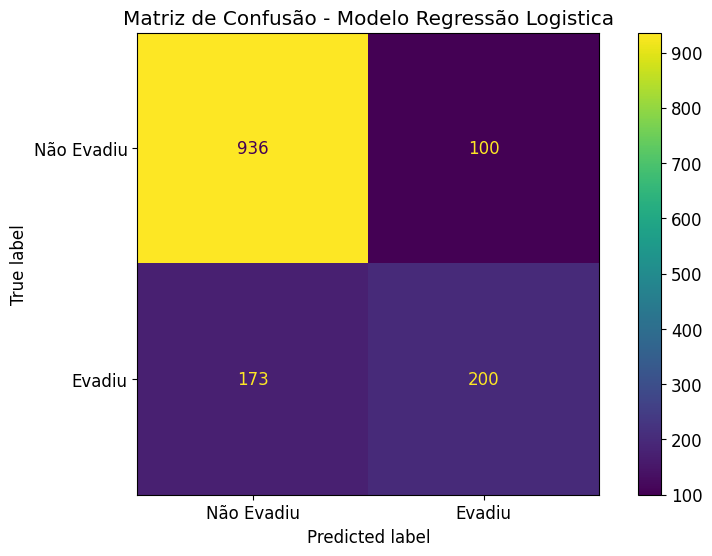

In [214]:

plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Modelo Regressão Logistica')
plt.grid(False)
plt.show()

<Figure size 400x400 with 0 Axes>

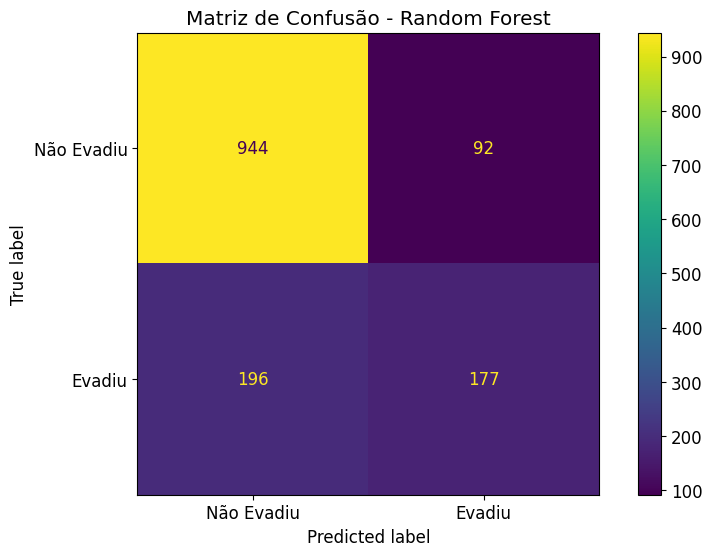

In [215]:
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.show()

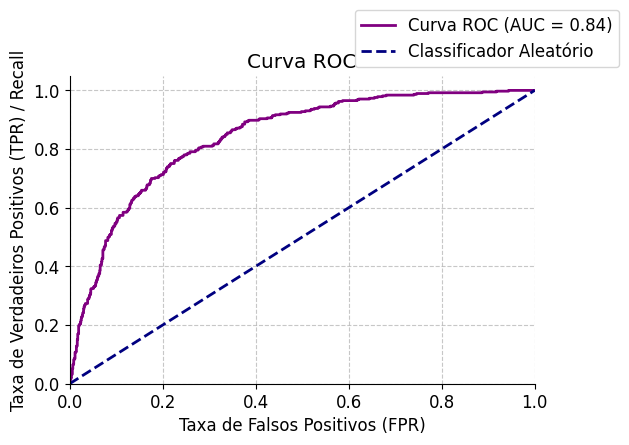

In [216]:
# 2. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.legend(bbox_to_anchor=(1.2, 1), loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

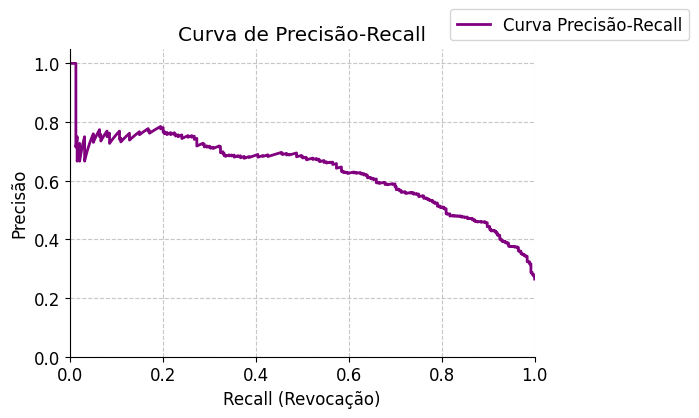

In [217]:
# 3. Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_logistic)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2, label='Curva Precisão-Recall')
plt.xlabel('Recall (Revocação)')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.legend(bbox_to_anchor=(0.8, 1), loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

1. Qual modelo teve o melhor desempenho?

Comparando as principais métricas para a classe 1 (Evadiu).

Métrica	Reg. Log.	Random Forest
Acurácia	0.8062	0.7956
Precisão	0.6667	0.6580
Recall	0.5362	0.4745
F1-score	0.5944	0.5514
✅ Conclusão:

A Regressão Logística apresentou desempenho superior em todas as métricas para a classe minoritária (Evadiu), especialmente no Recall, que mede a capacidade de identificar corretamente os clientes que vão evadir.

Isso é crítico em casos de churn, onde é preferível errar por excesso (falsos positivos) do que por omissão (falsos negativos).

Algum modelo apresentou overfitting ou underfitting?
▶ Regressão Logística

Bom equilíbrio entre precisão (0.67) e recall (0.54), com F1-score razoável (0.59).

A diferença entre as métricas das duas classes não é extrema.

Não há sinais claros de overfitting ou underfitting.

Modelo simples e interpretável, ideal para dados com relações lineares.

Conclusão: Modelo bem ajustado.

▶ Random Forest

Embora seja um modelo mais complexo, seu desempenho é ligeiramente inferior em todas as métricas.

Recall da classe "Evadiu" caiu para 0.47, o que indica que o modelo não está captando bem os padrões da classe minoritária.

Pode ser um caso de leve underfitting, o que é contraintuitivo para Random Forest — que costuma tender ao overfitting se mal regulado.

Conclusão: Possível underfitting leve — o modelo não está aproveitando todo seu potencial.

✅ Conclusão Geral

A Regressão Logística é o modelo mais indicado com base nas métricas apresentadas: melhor desempenho, mais interpretável, e sem sinais de overfitting ou underfitting.
O Random Forest, embora potencialmente mais poderoso, está subutilizado — provavelmente por falta de ajustes nos parâmetros ou balanceamento de classes. Com melhorias, pode se tornar competitivo ou até superior.

#Interpretação e conclusões

In [218]:
# Coeficientes da Regressão Logística
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---")
print(coefficients.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---
                                 Feature  Coefficient  Absolute_Coefficient
                           Tempo_servico    -1.431594              1.431594
                          Cobranca_total     0.690848              0.690848
                       Contrato_Two year    -0.646547              0.646547
            Servico_internet_Fiber optic     0.558005              0.558005
                     Servico_internet_No    -0.462619              0.462619
                       Contrato_One year    -0.292323              0.292323
                           Taxas_mensais    -0.259757              0.259757
                          Contas_diarias    -0.187013              0.187013
                            Streaming_TV     0.181739              0.181739
                           Varias_linhas     0.174945              0.174945
       Metodo_pagamento_Electronic check     0.165310              0.165310
               

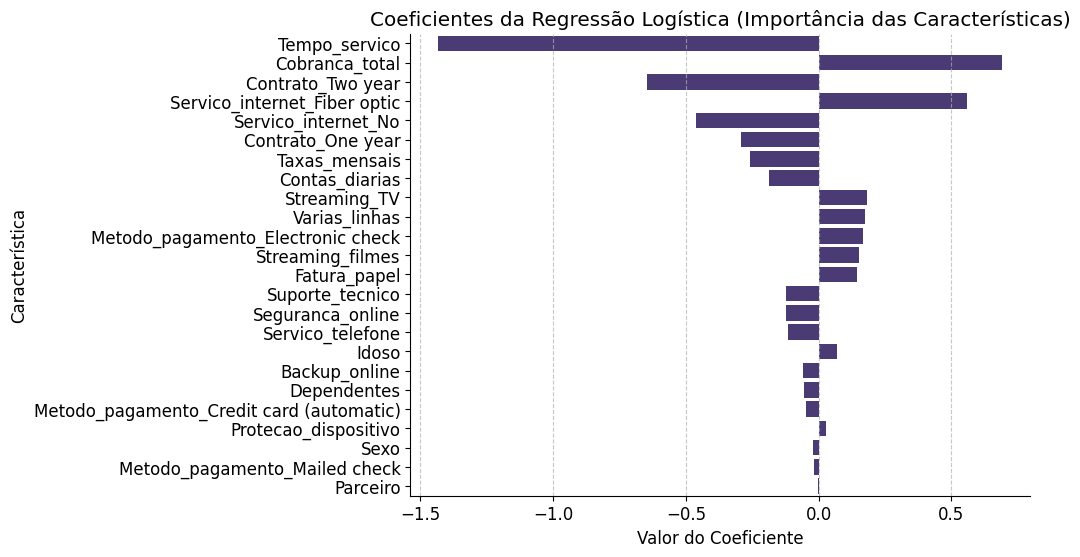

In [219]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)  # Sem palette
plt.title('Coeficientes da Regressão Logística (Importância das Características)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

 Interpretação dos Coeficientes:

Sinal: Um coeficiente positivo indica que, quanto maior o valor da feature, maior a probabilidade de churn. Um coeficiente negativo indica o oposto.

Magnitude: A magnitude (valor absoluto) do coeficiente reflete a força da influência da feature na probabilidade de churn. Coeficientes com valores absolutos maiores são mais importantes.

In [220]:
# =============================================================================
# TREINAMENTO DO MODELO - RANDOM FOREST
# =============================================================================

# Random Forest:
# - Ensemble de múltiplas árvores de decisão
# - Reduz overfitting através de bagging
# - Fornece importância das features
# - Robusto a outliers e dados desbalanceados
# - random_state=42 para reprodutibilidade
# Treinar o modelo Random Forest (sem normalização, como já feito)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Importância das variáveis do Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---")
print(feature_importances.head(24).to_string(index=False))
print("-" * 70)

--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---
                                 Feature  Importance
                          Cobranca_total    0.172899
                           Tempo_servico    0.150137
                           Taxas_mensais    0.135572
                          Contas_diarias    0.122270
            Servico_internet_Fiber optic    0.043272
       Metodo_pagamento_Electronic check    0.040483
                       Contrato_Two year    0.036269
                                    Sexo    0.024989
                            Fatura_papel    0.024645
                       Contrato_One year    0.023695
                         Suporte_tecnico    0.021932
                                Parceiro    0.021523
                        Seguranca_online    0.020614
                           Backup_online    0.018991
                                   Idoso    0.018928
                             Dependentes    0.018327
                   

• Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores

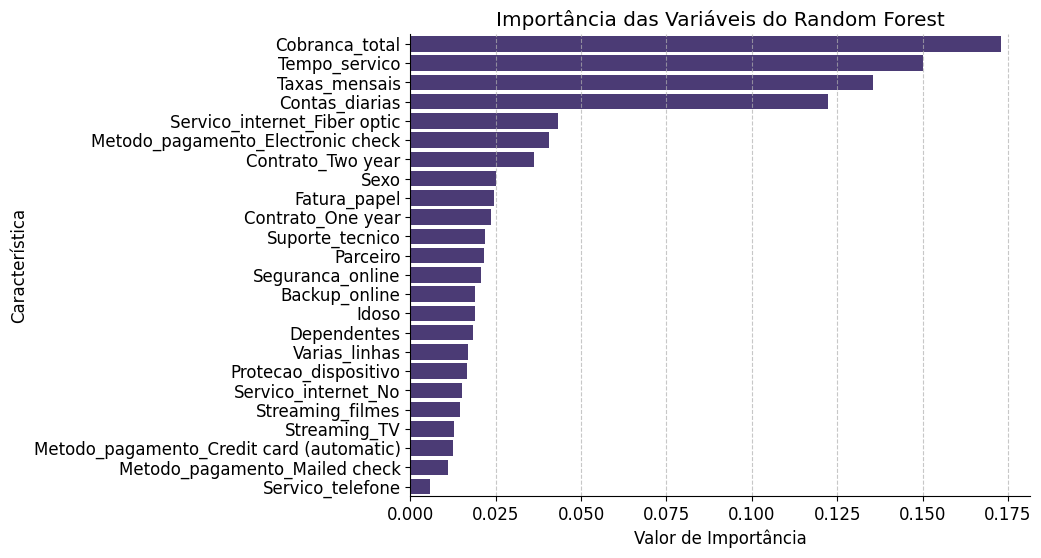

In [221]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)  # Removido palette
plt.title('Importância das Variáveis do Random Forest')
plt.xlabel('Valor de Importância')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

Interpretação da Importância das Variáveis:

Valores maiores de "Importance" indicam que a variável teve um papel mais significativo na capacidade do modelo de prever o churn.

Variáveis como Cobranca_total, Tempo_serico, Taxas_mensais e tipos de contrato tendem a ser muito relevantes, pois são frequentemente utilizadas para dividir os dados nas árvores de decisão.

• SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.

In [222]:
# =============================================================================
# TREINAMENTO DO MODELO - SUPPORT VECTOR MACHINE (SVM)
# =============================================================================

# Support Vector Machine (SVM):
# - Algoritmo poderoso para classificação e regressão.
# - Busca o hiperplano que melhor separa as classes.
# - "kernel='linear'": Utiliza um kernel linear para permitir a interpretação dos coeficientes.
# - random_state=42 para reprodutibilidade.
# Treinar o modelo SVM (com kernel linear para interpretar coeficientes)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Coeficientes do SVM Linear.
# svm_model.coef_[0] contém os coeficientes para a primeira (e única) classe positiva em uma classificação binária
coefficients_svm = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
coefficients_svm['Absolute_Coefficient'] = abs(coefficients_svm['Coefficient'])
coefficients_svm = coefficients_svm.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---")
print(coefficients_svm.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---
                                 Feature  Coefficient  Absolute_Coefficient
            Servico_internet_Fiber optic     0.741572              0.741572
                           Tempo_servico    -0.513671              0.513671
                           Taxas_mensais    -0.304564              0.304564
                          Cobranca_total    -0.302803              0.302803
                     Servico_internet_No    -0.194134              0.194134
                        Streaming_filmes     0.145354              0.145354
                            Streaming_TV     0.141969              0.141969
                           Varias_linhas     0.136781              0.136781
                       Contrato_One year    -0.131202              0.131202
       Metodo_pagamento_Electronic check     0.126704              0.126704
                         Suporte_tecnico    -0.100208              0.100208
          

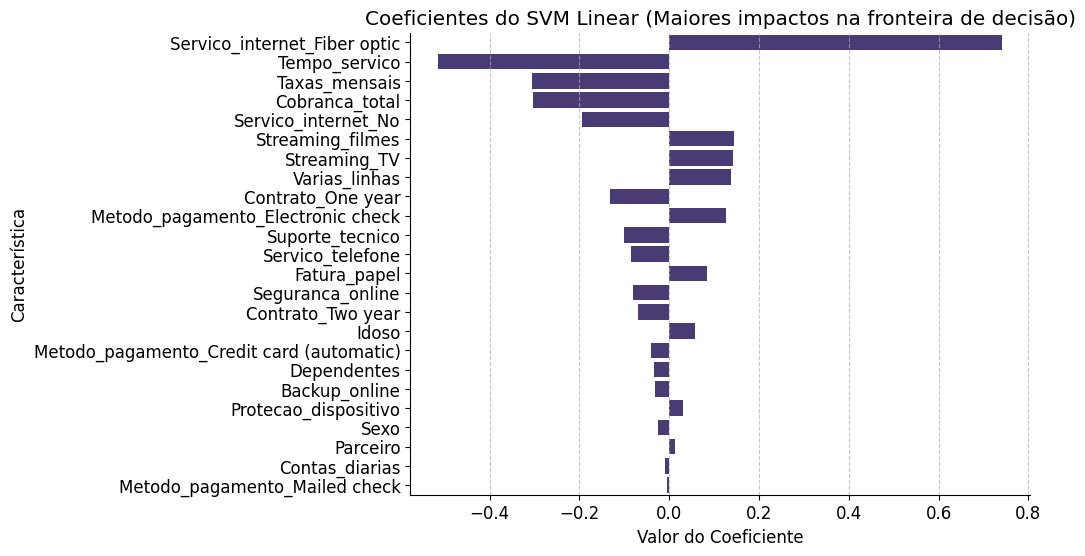

In [223]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_svm)  # Removido palette
plt.title('Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()